In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

# sklearn
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Функция для загрузки файла вручную
def manual_upload(file_name):
    print(f"Файл {file_name} не найден. Пожалуйста, загрузите файл вручную.")
    uploaded = files.upload()
    if file_name in uploaded:
        print(f"Файл {file_name} успешно загружен.")
        return file_name
    else:
        raise FileNotFoundError(f"Файл {file_name} не был загружен.")


In [2]:
# Пути к датасетам
CLASSIFICATION_DATA_PATH = "diabetes_data_upload.csv"
REGRESSION_DATA_PATH = "laptop_price_data.csv"

# Загружаем датасет для классификации (ранее выявление диабета)
if os.path.exists(CLASSIFICATION_DATA_PATH):
    df_clf = pd.read_csv(CLASSIFICATION_DATA_PATH)
else:
    CLASSIFICATION_DATA_PATH = manual_upload("diabetes_data_upload.csv")
    df_clf = pd.read_csv(CLASSIFICATION_DATA_PATH)

print("Форма датасета (классификация):", df_clf.shape)
print(df_clf.head())

# Загружаем датасет для регрессии (цены ноутбуков)
if os.path.exists(REGRESSION_DATA_PATH):
    df_reg = pd.read_csv(REGRESSION_DATA_PATH)
else:
    REGRESSION_DATA_PATH = manual_upload("laptop_price_data.csv")
    df_reg = pd.read_csv(REGRESSION_DATA_PATH)

print("\nФорма датасета (регрессия):", df_reg.shape)
print(df_reg.head())

# Проведём краткую проверку/очистку данных (повторяем EDA из ЛР№1)
print("\nИнформация о датасете классификации:")
print(df_clf.info())
print("\nИнформация о датасете регрессии:")
print(df_reg.info())


Файл diabetes_data_upload.csv не найден. Пожалуйста, загрузите файл вручную.


Saving diabetes_data_upload.csv to diabetes_data_upload.csv
Файл diabetes_data_upload.csv успешно загружен.
Форма датасета (классификация): (520, 17)
   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No            

Saving laptop_price_data.csv to laptop_price_data.csv
Файл laptop_price_data.csv успешно загружен.

Форма датасета (регрессия): (823, 19)
    brand processor_brand processor_name processor_gnrtn ram_gb ram_type  \
0    ASUS           Intel        Core i3            10th   4 GB     DDR4   
1  Lenovo           Intel        Core i3            10th   4 GB     DDR4   
2  Lenovo           Intel        Core i3            10th   4 GB     DDR4   
3    ASUS           Intel        Core i5            10th   8 GB     DDR4   
4    ASUS           Intel   Celeron Dual   Not Available   4 GB     DDR4   

      ssd      hdd       os  os_bit graphic_card_gb  weight     warranty  \
0    0 GB  1024 GB  Windows  64-bit            0 GB  Casual  No warranty   
1    0 GB  1024 GB  Windows  64-bit            0 GB  Casual  No warranty   
2    0 GB  1024 GB  Windows  64-bit            0 GB  Casual  No warranty   
3  512 GB     0 GB  Windows  32-bit            2 GB  Casual  No warranty   
4    0 GB   512 GB  Windo

Пункт 2 – Создание бейзлайна (Decision Tree)

=== Бейзлайн (DecisionTreeClassifier) ===
Accuracy: 0.9519230769230769
Confusion Matrix:
[[33  0]
 [ 5 66]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.93      0.96        71

    accuracy                           0.95       104
   macro avg       0.93      0.96      0.95       104
weighted avg       0.96      0.95      0.95       104



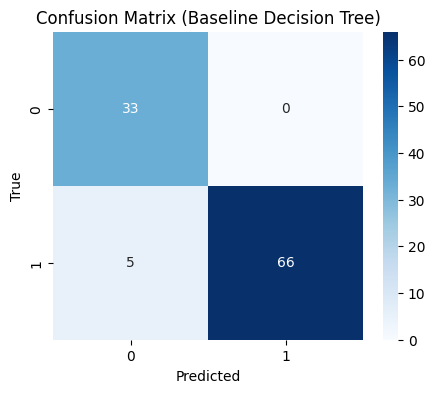


=== Бейзлайн (DecisionTreeRegressor) ===
MSE: 908779349.7816498
R^2: 0.5336739964203474


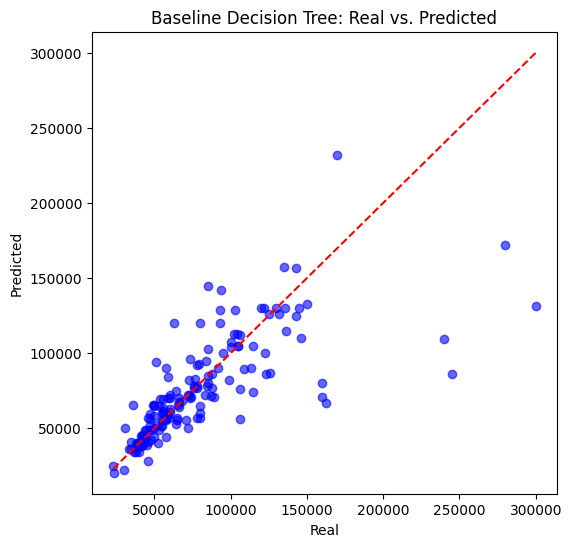

In [3]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# -------------------------
# Классификация (Decision Tree)
# -------------------------

target_col_clf = 'class'
X_clf = df_clf.drop(columns=[target_col_clf])
y_clf = df_clf[target_col_clf]

# 1) Кодируем все категориальные признаки в X_clf
categorical_columns = X_clf.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    X_clf[col] = le.fit_transform(X_clf[col])

# 2) Если y_clf тоже строковый (object), кодируем его
if y_clf.dtype == 'object':
    le_y = LabelEncoder()
    y_clf = le_y.fit_transform(y_clf)

# Разделяем на train/test
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42
)

# Обучаем дерево (бейзлайн)
dtc_base = DecisionTreeClassifier(random_state=42)
dtc_base.fit(X_train_c, y_train_c)

# Предсказания и метрики
y_pred_c_base = dtc_base.predict(X_test_c)
acc_base = accuracy_score(y_test_c, y_pred_c_base)
print("=== Бейзлайн (DecisionTreeClassifier) ===")
print("Accuracy:", acc_base)
print("Confusion Matrix:")
print(confusion_matrix(y_test_c, y_pred_c_base))
print("Classification Report:")
print(classification_report(y_test_c, y_pred_c_base))

# Визуализация: Confusion Matrix (heatmap)
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test_c, y_pred_c_base), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Baseline Decision Tree)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# -------------------------
# Регрессия (Decision Tree)
# -------------------------
# Пример: target_col_reg = 'Price'
target_col_reg = 'Price'
X_reg = df_reg.drop(columns=[target_col_reg])
y_reg = df_reg[target_col_reg]

# Если в данных регрессии тоже есть категориальные признаки, закодируем их:
cat_cols_reg = X_reg.select_dtypes(include=['object']).columns
for col in cat_cols_reg:
    le = LabelEncoder()
    X_reg[col] = le.fit_transform(X_reg[col])

# Разделяем
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Обучаем дерево (бейзлайн)
dtr_base = DecisionTreeRegressor(random_state=42)
dtr_base.fit(X_train_r, y_train_r)

# Предсказания и метрики
y_pred_r_base = dtr_base.predict(X_test_r)
mse_base = mean_squared_error(y_test_r, y_pred_r_base)
r2_base = r2_score(y_test_r, y_pred_r_base)
print("\n=== Бейзлайн (DecisionTreeRegressor) ===")
print("MSE:", mse_base)
print("R^2:", r2_base)

# Визуализация: scatter "y_test vs y_pred"
plt.figure(figsize=(6,6))
plt.scatter(y_test_r, y_pred_r_base, color='blue', alpha=0.6)
plt.plot([y_test_r.min(), y_test_r.max()],
         [y_test_r.min(), y_test_r.max()],
         color='red', linestyle='--')
plt.title("Baseline Decision Tree: Real vs. Predicted")
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.show()


Пункт 3 – Улучшение бейзлайна

3.a – Сформулируем гипотезы (предобработка, новые признаки, подбор гиперпараметров)

Для простоты покажем пример подборки гиперпараметров через GridSearchCV:
max_depth, min_samples_split, min_samples_leaf и т.д.

Лучшие параметры (DecisionTreeClassifier): {'max_depth': 10, 'min_samples_leaf': 1}
Лучший скор на CV: 0.9447224828832587

=== Улучшенная модель (DecisionTreeClassifier) ===
Accuracy: 0.9519230769230769
Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.93      0.96        71

    accuracy                           0.95       104
   macro avg       0.93      0.96      0.95       104
weighted avg       0.96      0.95      0.95       104


Сравнение (Accuracy) — Бейзлайн: 0.952 vs Улучшенный: 0.952

Лучшие параметры (DecisionTreeRegressor): {'max_depth': 5, 'min_samples_leaf': 1}
Лучший скор на CV (R^2): 0.5960823293609099

=== Улучшенная модель (DecisionTreeRegressor) ===
MSE: 1077908430.4912148
R^2: 0.4468880364231912

Сравнение (MSE) — Бейзлайн: 908779349.782 vs Улучшенный: 1077908430.491
Сравнение (R^2)  — Бейзлайн: 0.534 vs Улучшенный: 0.447


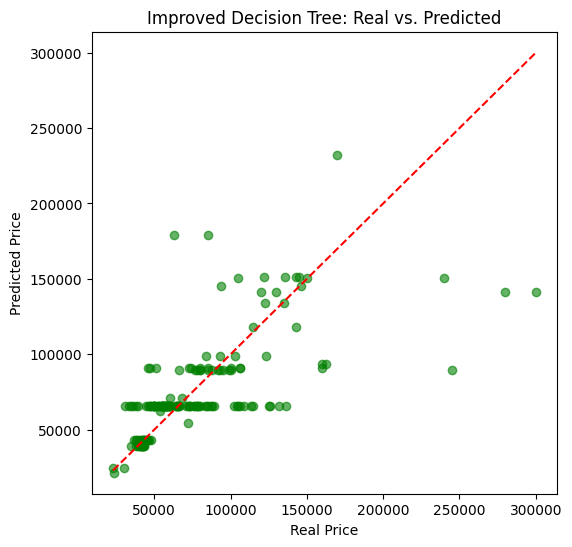

In [4]:
# -------------------------
# Классификация
# -------------------------
param_grid_clf = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_leaf': [1, 2, 5, 10]
}

grid_search_clf = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_clf,
    cv=3,
    n_jobs=-1
)
grid_search_clf.fit(X_train_c, y_train_c)

print("Лучшие параметры (DecisionTreeClassifier):", grid_search_clf.best_params_)
print("Лучший скор на CV:", grid_search_clf.best_score_)

# Обучаем модель с лучшими параметрами
dtc_improved = DecisionTreeClassifier(
    random_state=42,
    **grid_search_clf.best_params_
)
dtc_improved.fit(X_train_c, y_train_c)

y_pred_c_improved = dtc_improved.predict(X_test_c)
acc_improved = accuracy_score(y_test_c, y_pred_c_improved)
print("\n=== Улучшенная модель (DecisionTreeClassifier) ===")
print("Accuracy:", acc_improved)
print("Classification Report:")
print(classification_report(y_test_c, y_pred_c_improved))

# Сравнение
print(f"\nСравнение (Accuracy) — Бейзлайн: {acc_base:.3f} vs Улучшенный: {acc_improved:.3f}")


# -------------------------
# Регрессия
# -------------------------
param_grid_reg = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_leaf': [1, 2, 5, 10]
}

grid_search_reg = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid_reg,
    cv=3,
    n_jobs=-1
)
grid_search_reg.fit(X_train_r, y_train_r)

print("\nЛучшие параметры (DecisionTreeRegressor):", grid_search_reg.best_params_)
print("Лучший скор на CV (R^2):", grid_search_reg.best_score_)

dtr_improved = DecisionTreeRegressor(
    random_state=42,
    **grid_search_reg.best_params_
)
dtr_improved.fit(X_train_r, y_train_r)

y_pred_r_improved = dtr_improved.predict(X_test_r)
mse_improved = mean_squared_error(y_test_r, y_pred_r_improved)
r2_improved = r2_score(y_test_r, y_pred_r_improved)
print("\n=== Улучшенная модель (DecisionTreeRegressor) ===")
print("MSE:", mse_improved)
print("R^2:", r2_improved)
print(f"\nСравнение (MSE) — Бейзлайн: {mse_base:.3f} vs Улучшенный: {mse_improved:.3f}")
print(f"Сравнение (R^2)  — Бейзлайн: {r2_base:.3f} vs Улучшенный: {r2_improved:.3f}")


# scatter "y_test vs y_pred"
plt.figure(figsize=(6,6))
plt.scatter(y_test_r, y_pred_r_improved, color='green', alpha=0.6)
plt.plot([y_test_r.min(), y_test_r.max()],
         [y_test_r.min(), y_test_r.max()],
         color='red', linestyle='--')
plt.title("Improved Decision Tree: Real vs. Predicted")
plt.xlabel("Real Price")
plt.ylabel("Predicted Price")
plt.show()

# Вывод: видим, что качество (accuracy, R^2, etc.) изменилось после подбора гиперпараметров.


Пункт 4 – Имплементация своего дерева

Здесь пишем упрощённую реализацию Decision Tree (для классификации и/или регрессии).

=== Самописная модель (DecisionStumpClassifier) ===
Accuracy: 0.7980769230769231
Confusion Matrix:
[[30  3]
 [18 53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.91      0.74        33
           1       0.95      0.75      0.83        71

    accuracy                           0.80       104
   macro avg       0.79      0.83      0.79       104
weighted avg       0.84      0.80      0.80       104

Сравнение с бейзлайном (Accuracy) — Бейзлайн: 0.952 vs Самописная: 0.798


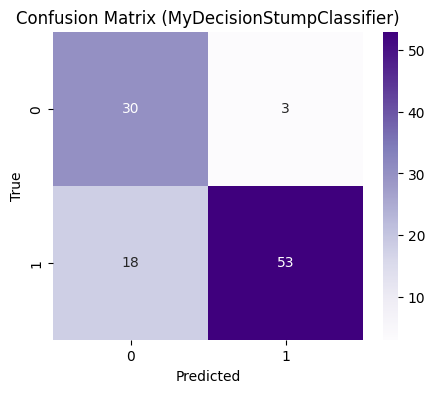

In [5]:
class MyDecisionStumpClassifier:
    def __init__(self):
        self.feature_index = None
        self.threshold = None
        self.pred_left = None
        self.pred_right = None

    def fit(self, X, y):
        """
        Находим такой признак и порог, чтобы минимизировать ошибку (gini/entropy).
        Для упрощения - brute force: перебираем все признаки и все уникальные значения
        """
        best_accuracy = -1
        for feature_i in range(X.shape[1]):
            values = np.unique(X.iloc[:, feature_i])
            for val in values:
                # Разделяем на левую/правую ветвь
                left_mask = X.iloc[:, feature_i] <= val
                right_mask = ~left_mask
                if len(y[left_mask]) == 0 or len(y[right_mask]) == 0:
                    continue
                left_pred = np.bincount(y[left_mask]).argmax()
                right_pred = np.bincount(y[right_mask]).argmax()

                # Предсказываем
                y_pred = np.array([left_pred if m else right_pred for m in left_mask])

                # Считаем accuracy
                acc = accuracy_score(y, y_pred)
                if acc > best_accuracy:
                    best_accuracy = acc
                    self.feature_index = feature_i
                    self.threshold = val
                    self.pred_left = left_pred
                    self.pred_right = right_pred

    def predict(self, X):
        left_mask = X.iloc[:, self.feature_index] <= self.threshold
        return np.array([
            self.pred_left if m else self.pred_right
            for m in left_mask
        ])

# -------------------------
# Обучим и сравним
# -------------------------
my_dsc = MyDecisionStumpClassifier()
my_dsc.fit(X_train_c, y_train_c)
y_pred_my = my_dsc.predict(X_test_c)
acc_my = accuracy_score(y_test_c, y_pred_my)
print("=== Самописная модель (DecisionStumpClassifier) ===")
print("Accuracy:", acc_my)
print("Confusion Matrix:")
print(confusion_matrix(y_test_c, y_pred_my))
print("Classification Report:")
print(classification_report(y_test_c, y_pred_my))

print(f"Сравнение с бейзлайном (Accuracy) — Бейзлайн: {acc_base:.3f} vs Самописная: {acc_my:.3f}")

# Визуализация confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test_c, y_pred_my), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix (MyDecisionStumpClassifier)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
